In [ ]:
'''
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.'''

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('heart.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (1025, 14)


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 1000 instead of 303!


In [7]:
data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")


In [8]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

C:\Users\snila\AppData\Local\Temp\ipykernel_16328\2966579873.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['sex'][data['sex'] == 0] = 'female'
C:\Users\snila\AppData\Local\Temp\ipykernel_16328\2966579873.py:1: SettingWithCopyWarni

In [9]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [10]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,male,typical angina,125,212,lower than 120mg/ml,ST-T wave abnormality,168,no,1.0,downsloping,2,reversable defect,0
1,53,male,typical angina,140,203,greater than 120mg/ml,normal,155,yes,3.1,upsloping,0,reversable defect,0
2,70,male,typical angina,145,174,lower than 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0
3,61,male,typical angina,148,203,lower than 120mg/ml,ST-T wave abnormality,161,no,0.0,downsloping,1,reversable defect,0
4,62,female,typical angina,138,294,greater than 120mg/ml,ST-T wave abnormality,106,no,1.9,flat,3,normal,0


In [11]:
#Grouping Features (by data type)¶
#As we have seen above there are three datatypes i.e object, int and floats. Let's group them according to type.


# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

C:\Users\snila\AppData\Local\Temp\ipykernel_16328\3511223875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_pct.index, y=target_pct.values, palette=['#FEAEFE', '#3FFEBA'])


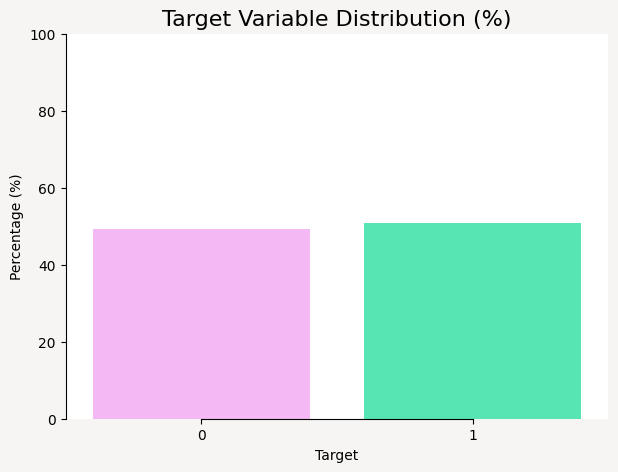

In [18]:
# Calculate percentages
target_pct = data['target'].value_counts(normalize=True).sort_index() * 100

# Plot
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
sns.barplot(x=target_pct.index, y=target_pct.values, palette=['#FEAEFE', '#3FFEBA'])

plt.title('Target Variable Distribution (%)', fontsize=16)
plt.xlabel('Target')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
sns.despine(trim=True)

In [19]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,54.6070,9.037822,29.0,48.0,56.0,61.0,77.0
cholesterol,1000.0,246.9960,51.700802,126.0,211.0,240.5,277.0,564.0
resting_blood_pressure,1000.0,131.5920,17.714326,94.0,120.0,130.0,140.0,200.0
max_heart_rate_achieved,1000.0,148.9770,23.083139,71.0,132.0,152.0,165.0,202.0
st_depression,1000.0,1.0924,1.180727,0.0,0.0,0.8,1.8,6.2
num_major_vessels,1000.0,0.7010,0.944718,0.0,0.0,0.0,1.0,3.0


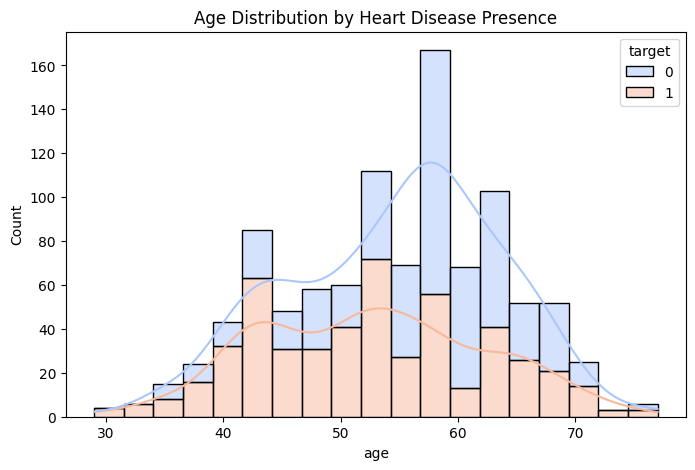

In [32]:
# 2. Age distribution by target
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='age', hue='target', kde=True, multiple='stack', palette='coolwarm')
plt.title("Age Distribution by Heart Disease Presence")
plt.show()

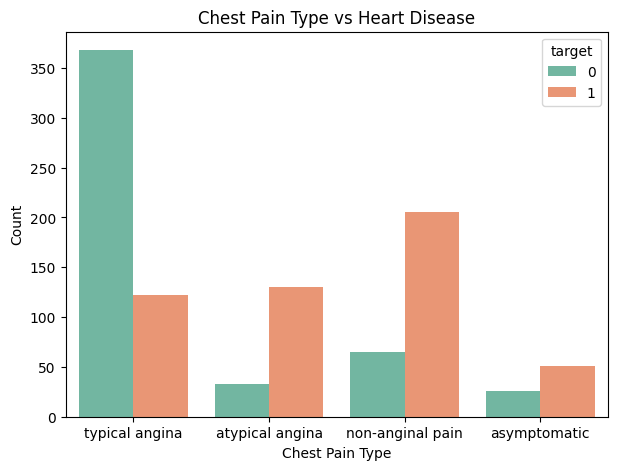

In [34]:
# 3. Chest pain type vs target
plt.figure(figsize=(7, 5))
sns.countplot(x='chest_pain_type', hue='target', data=data, palette='Set2')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

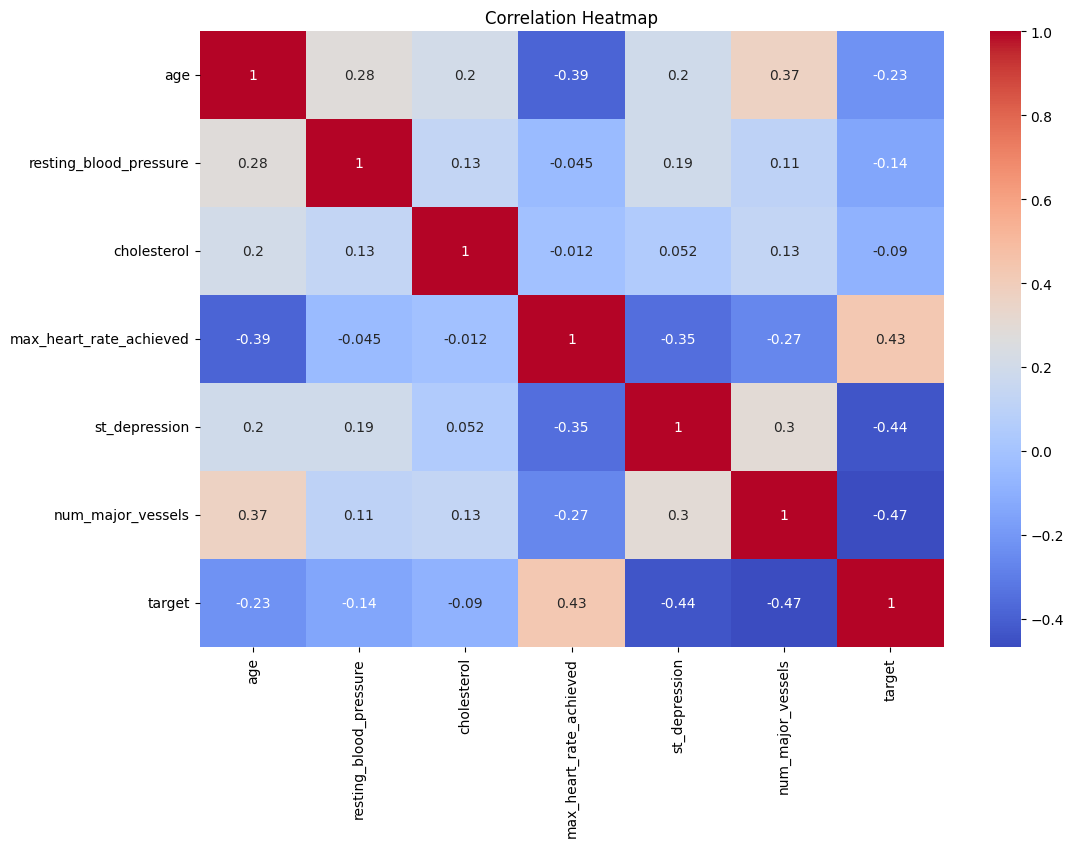

In [36]:
# 4. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [50]:
# Encode categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)  # avoids dummy variable trap

In [51]:
# Features and target
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [55]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        92
           1       0.88      0.84      0.86       108

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



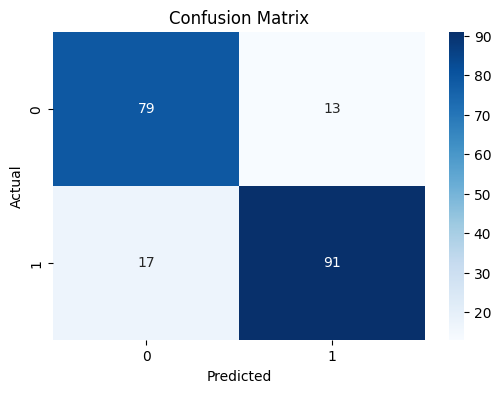

In [56]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()